### Pontos de pivo para Daytrade
Uma estrategia basica para trading

OBS: Esse modelo Só é funcional para ativos com volatilidade superior a do IBOV, ativos de Beta baixo deverar consultar se compensa com os custo operacionais.

In [1]:
import pandas as pd
#importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance

In [98]:
ativo = yfinance.Ticker("itub4.SA")
df = ativo.history(interval="15m", period = "1d")

# buscando series historias outro jeito mais simples
#df = pdr.DataReader('itub4.SA',data_source='yahoo', start='2020-02-28', end = '2020-04-02');
#df.tail()

In [99]:
df.iloc[-1].copy()

Open            2.432000e+01
High            2.432000e+01
Low             2.422000e+01
Close           2.426000e+01
Volume          1.510900e+06
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2020-10-20 15:45:00-03:00, dtype: float64

In [100]:
proximo_dia

Open                24.270000
High                24.299999
Low                 24.250000
Close               24.260000
Volume          985300.000000
Dividends            0.000000
Stock Splits         0.000000
Pivot               24.270000
R1                  24.290000
S1                  24.240000
R2                  24.319999
S2                  24.220001
R3                  24.369998
S3                  24.170001
Name: 2020-10-20 15:55:00-03:00, dtype: float64

### Agora vamos para a formula do pivot point
Fonte:
https://www.mql5.com/pt/code/95

Resistência 3 = High + 2*(Pivot - Low)

Resistência 2 = Pivot + (R1 - S1)

Resistência 1 = 2 * Pivot - Low

Pontos Pivô = ( High + Close + Low )/3

Suporte 1 = 2 * Pivot - High

Suporte 2 = Pivot - (R1 - S1)

Suporte 3 = Low - 2*(High - Pivot)


In [65]:
proximo_dia['Pivot'] = (proximo_dia['High'] + proximo_dia['Low'] + proximo_dia['Close'])/3
proximo_dia['R1'] = 2*proximo_dia['Pivot'] - proximo_dia['Low']
proximo_dia['S1'] = 2*proximo_dia['Pivot'] - proximo_dia['High']
proximo_dia['R2'] = proximo_dia['Pivot'] + (proximo_dia['High'] - proximo_dia['Low'])
proximo_dia['S2'] = proximo_dia['Pivot'] - (proximo_dia['High'] - proximo_dia['Low'])
proximo_dia['R3'] = proximo_dia['Pivot'] + 2*(proximo_dia['High'] - proximo_dia['Low'])
proximo_dia['S3'] = proximo_dia['Pivot'] - 2*(proximo_dia['High'] - proximo_dia['Low'])


In [66]:
#exportar data frame
#df.to_excel('csna3.xlsx')

### Generalizando para todos os daods


In [67]:
#Codigo para exclução de colunas 
#df =df.drop(columns=[('')])

In [68]:
#criando colulas vazias no data frema
df['Pivot'],df['R1'],df['S1'] = 'NaN','NaN','NaN'

In [69]:
#visualizando DF
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1
Datetime,,,,,,,,,,
2020-10-20 10:05:00-03:00,23.520000,23.620001,23.500000,23.610001,160200,0,0,NaN,NaN,NaN
2020-10-20 10:10:00-03:00,23.600000,23.719999,23.580000,23.700001,410200,0,0,NaN,NaN,NaN
2020-10-20 10:15:00-03:00,23.709999,23.850000,23.709999,23.770000,678600,0,0,NaN,NaN,NaN
2020-10-20 10:20:00-03:00,23.780001,23.809999,23.709999,23.799999,409700,0,0,NaN,NaN,NaN
2020-10-20 10:25:00-03:00,23.799999,23.959999,23.780001,23.940001,1056200,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-10-20 15:35:00-03:00,24.340000,24.350000,24.299999,24.320000,355100,0,0,NaN,NaN,NaN
2020-10-20 15:40:00-03:00,24.330000,24.350000,24.309999,24.309999,429600,0,0,NaN,NaN,NaN
2020-10-20 15:45:00-03:00,24.320000,24.320000,24.230000,24.240000,286600,0,0,NaN,NaN,NaN


In [70]:
#Criando valor para a Coluna "PIVOT"
for index, row in df.iterrows():
    df['Pivot'] = (df['High'] + df['Low'] + df['Close'])/3;
    df['R1'] = 2*df['Pivot'] - df['Low'];
    df['S1'] = 2*df['Pivot'] - df['High'];
    
    

In [93]:
#visualizando so dados das novas colunas
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,
2020-10-20 10:15:00-03:00,23.709999,23.850000,23.709999,23.770000,678600,0,0,23.776667,23.843334,23.703333,0.103334,0,10.3334
2020-10-20 10:20:00-03:00,23.780001,23.809999,23.709999,23.799999,409700,0,0,23.773333,23.836666,23.736666,0.0233326,0,2.33326
2020-10-20 10:25:00-03:00,23.799999,23.959999,23.780001,23.940001,1056200,0,0,23.893333,24.006666,23.826668,0.166668,0,16.6668
2020-10-20 10:30:00-03:00,23.940001,24.000000,23.879999,23.930000,1514600,0,0,23.936666,23.993334,23.873333,0.0366669,0,3.66669
2020-10-20 10:35:00-03:00,23.930000,24.049999,23.889999,24.049999,882300,0,0,23.996666,24.103333,23.943333,0.113333,0,11.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20 15:35:00-03:00,24.340000,24.350000,24.299999,24.320000,355100,0,0,24.323333,24.346667,24.296666,-0.016667,0.00333341,-1.33336
2020-10-20 15:40:00-03:00,24.330000,24.350000,24.309999,24.309999,429600,0,0,24.323333,24.336667,24.296666,-0.0133336,0,-1.33336
2020-10-20 15:45:00-03:00,24.320000,24.320000,24.230000,24.240000,286600,0,0,24.263333,24.296666,24.206666,0,0.0566661,5.66661


In [72]:
#criando colulas vazias no data frema
df['Compra pivot'],df['Venda S1'],df['Acumulado'] = 'NaN','NaN','NaN'

In [73]:
#copiando dataframe para poder fazer os calculos
#dfcalc = df.copy()

In [74]:
#excluindo primeira linha do df para poder usar como inicio o comparador do outro df calc vou excluir apenas com um filtro
#df = df.loc[df.index > '2020-01-02']

In [75]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,
2020-10-20 10:05:00-03:00,23.520000,23.620001,23.500000,23.610001,160200,0,0,23.576667,23.653334,23.533333,NaN,NaN,NaN
2020-10-20 10:10:00-03:00,23.600000,23.719999,23.580000,23.700001,410200,0,0,23.666667,23.753333,23.613334,NaN,NaN,NaN
2020-10-20 10:15:00-03:00,23.709999,23.850000,23.709999,23.770000,678600,0,0,23.776667,23.843334,23.703333,NaN,NaN,NaN
2020-10-20 10:20:00-03:00,23.780001,23.809999,23.709999,23.799999,409700,0,0,23.773333,23.836666,23.736666,NaN,NaN,NaN
2020-10-20 10:25:00-03:00,23.799999,23.959999,23.780001,23.940001,1056200,0,0,23.893333,24.006666,23.826668,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20 15:35:00-03:00,24.340000,24.350000,24.299999,24.320000,355100,0,0,24.323333,24.346667,24.296666,NaN,NaN,NaN
2020-10-20 15:40:00-03:00,24.330000,24.350000,24.309999,24.309999,429600,0,0,24.323333,24.336667,24.296666,NaN,NaN,NaN
2020-10-20 15:45:00-03:00,24.320000,24.320000,24.230000,24.240000,286600,0,0,24.263333,24.296666,24.206666,NaN,NaN,NaN


In [76]:
#renomedo colunas  codigo comentado para nao execultaR
##dfcalc = dfcalc.rename(columns={'Pivot': 'P-Pivot','S1':'S-S1'})

In [77]:
#Criando nova coluna inutil kkkkkkkk
###df['P-Pivot'] = 'NaN'

## Inicio de teste de loops
Não execultar linhas abaixos

In [78]:
#testes = df['Pivot'][n]/df['Pivot'][n -1]

In [79]:
#testes

In [80]:
# testa dor de entrada de valor está correto!

#posicao = 4
#if df['High'][posicao]>df['Pivot'][posicao - 1]:
#    df['Compra pivot'][posicao] = df['Close'][posicao] - df['Pivot'][posicao - 1]
#else:
#    df['Compra pivot'][posicao] = 0

In [81]:
#n = 0
#while n<7:
#    df['Compra pivot'] = 'NaN';
 #   n = n +1;

## Fim de teste de loops
tudo abaixo pode ser execultado 

In [82]:
#criando valores de lucro na entrada comprando no Pivot
posicao = 0
while posicao<len(df['Pivot']):
    if df['High'][posicao]>df['Pivot'][posicao - 1]:
        df['Compra pivot'][posicao] = df['Close'][posicao] - df['Pivot'][posicao - 1]
    else:
        df['Compra pivot'][posicao] = 0
    posicao = posicao +1;


<ipython-input-82-3557dc5c3190>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Compra pivot'][posicao] = 0
<ipython-input-82-3557dc5c3190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Compra pivot'][posicao] = df['Close'][posicao] - df['Pivot'][posicao - 1]


In [83]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,
2020-10-20 15:35:00-03:00,24.34,24.350000,24.299999,24.320000,355100,0,0,24.323333,24.346667,24.296666,-0.016667,NaN,NaN
2020-10-20 15:40:00-03:00,24.33,24.350000,24.309999,24.309999,429600,0,0,24.323333,24.336667,24.296666,-0.0133336,NaN,NaN
2020-10-20 15:45:00-03:00,24.32,24.320000,24.230000,24.240000,286600,0,0,24.263333,24.296666,24.206666,0,NaN,NaN
2020-10-20 15:50:00-03:00,24.23,24.280001,24.219999,24.270000,239000,0,0,24.256667,24.293334,24.233333,0.00666746,NaN,NaN
2020-10-20 15:55:00-03:00,24.27,24.299999,24.250000,24.260000,985300,0,0,24.270000,24.290000,24.240000,0.00333341,NaN,NaN


In [84]:
#criando valores de lucro na entrada vendido na Primeiro Suporte
posicao = 0
while posicao<len(df['S1']):
    if df['Low'][posicao]<df['S1'][posicao - 1]:
        df['Venda S1'][posicao] = df['S1'][posicao - 1] - df['Close'][posicao]
    else:
        df['Venda S1'][posicao] = 0
    posicao = posicao +1;


<ipython-input-84-35726b5858ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venda S1'][posicao] = df['S1'][posicao - 1] - df['Close'][posicao]
<ipython-input-84-35726b5858ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venda S1'][posicao] = 0


In [85]:
# SOMANDO SO RESULTADOS DOS GANHOS DAS ENTRADAS DE UM LOTE MINIMO DE 100 AÇOES- COMPRA E VENDA; 
for index, row in df.iterrows():
    df.loc[index,'Acumulado'] = (df.loc[index,'Compra pivot'] + df.loc[index,'Venda S1'])*100;

In [90]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,
2020-10-20 15:35:00-03:00,24.34,24.350000,24.299999,24.320000,355100,0,0,24.323333,24.346667,24.296666,-0.016667,0.00333341,-1.33336
2020-10-20 15:40:00-03:00,24.33,24.350000,24.309999,24.309999,429600,0,0,24.323333,24.336667,24.296666,-0.0133336,0,-1.33336
2020-10-20 15:45:00-03:00,24.32,24.320000,24.230000,24.240000,286600,0,0,24.263333,24.296666,24.206666,0,0.0566661,5.66661
2020-10-20 15:50:00-03:00,24.23,24.280001,24.219999,24.270000,239000,0,0,24.256667,24.293334,24.233333,0.00666746,0,0.666746
2020-10-20 15:55:00-03:00,24.27,24.299999,24.250000,24.260000,985300,0,0,24.270000,24.290000,24.240000,0.00333341,0,0.333341


In [87]:
#excluindo primeira linha do df usar como inicio do comparador - SE NAO VC TEM UM ENTRADA COM O PARAMENTRO DO ULTIMO DIA
# E ISSO IRIA MUDAR O VALOR NA SOMATORIA TOTAL
df = df.loc[df.index > '2020-10-20 10:10:00']

In [88]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,
2020-10-20 10:15:00-03:00,23.709999,23.850000,23.709999,23.770000,678600,0,0,23.776667,23.843334,23.703333,0.103334,0,10.3334
2020-10-20 10:20:00-03:00,23.780001,23.809999,23.709999,23.799999,409700,0,0,23.773333,23.836666,23.736666,0.0233326,0,2.33326
2020-10-20 10:25:00-03:00,23.799999,23.959999,23.780001,23.940001,1056200,0,0,23.893333,24.006666,23.826668,0.166668,0,16.6668
2020-10-20 10:30:00-03:00,23.940001,24.000000,23.879999,23.930000,1514600,0,0,23.936666,23.993334,23.873333,0.0366669,0,3.66669
2020-10-20 10:35:00-03:00,23.930000,24.049999,23.889999,24.049999,882300,0,0,23.996666,24.103333,23.943333,0.113333,0,11.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20 15:35:00-03:00,24.340000,24.350000,24.299999,24.320000,355100,0,0,24.323333,24.346667,24.296666,-0.016667,0.00333341,-1.33336
2020-10-20 15:40:00-03:00,24.330000,24.350000,24.309999,24.309999,429600,0,0,24.323333,24.336667,24.296666,-0.0133336,0,-1.33336
2020-10-20 15:45:00-03:00,24.320000,24.320000,24.230000,24.240000,286600,0,0,24.263333,24.296666,24.206666,0,0.0566661,5.66661


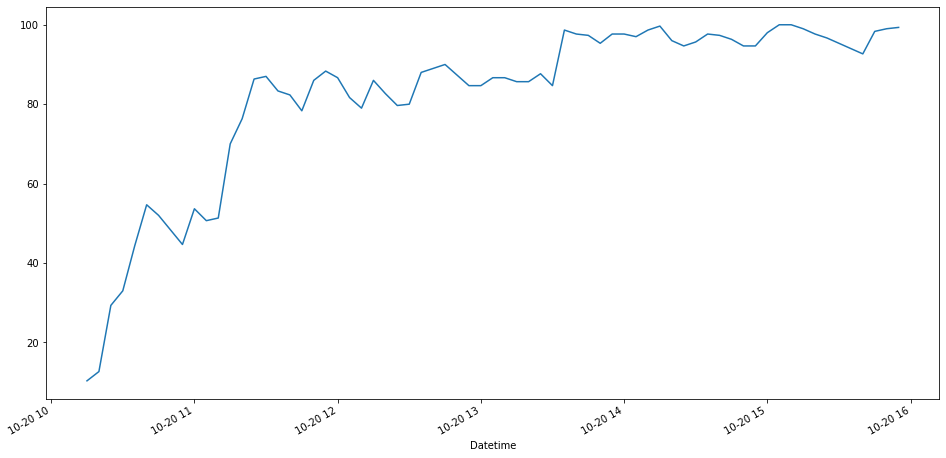

In [89]:
np.cumsum(df['Acumulado']).plot(figsize = (16,8))